# metrics_utils model explanations

In this jupyter nootebook we will show you how the methods are used to transform saliency maps.

In [1]:
import numpy as np
import metrics_utils as utils
from matplotlib import pyplot as plt
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image

We will work we this image all along the documents

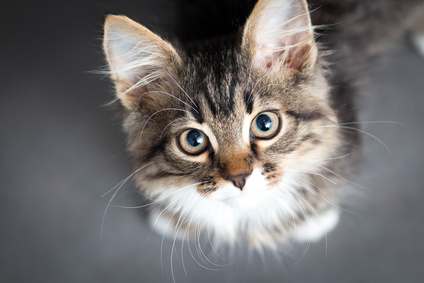

In [6]:
image = Image.open('../Images/Images_examples/chat.jpeg')
image

### Threshold a heat map

Let's imagine that we have a saliency map as below:

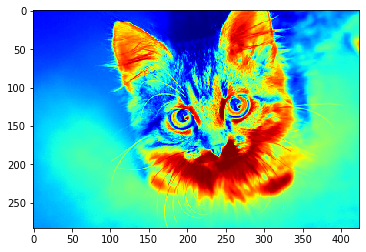

In [3]:
heat_map = cv.imread("../Images/Images_examples/chat.jpeg", cv.COLORMAP_JET)
plt.imshow(heat_map, origin="upper", cmap='jet', interpolation='nearest')

The method binarize give a mask using a threshold giving as entry. The threshold depends on the coefficient in the heat map, It may be a value between 0 and 1 as well a value between 0 and 255.

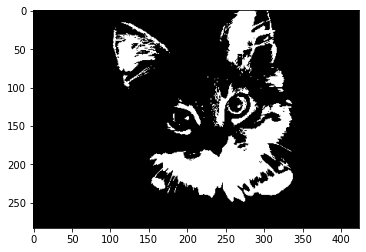

In [14]:
#In our example the values are between 0 and 255 we chosed 190 as threshold
mask = utils.binarize(heat_map, 190)
plt.imshow(mask, 'gray')

We can also use the method get_average that calculate the aveage saliency in a heat map and get the binary mask.

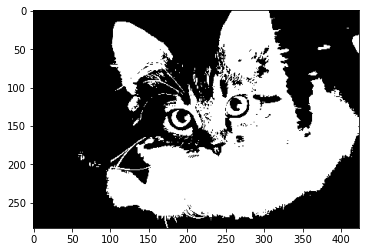

In [15]:
saliency_average = utils.get_average(heat_map)
average_mask = utils.binarize(heat_map, saliency_average)
plt.imshow(average_mask, 'gray')

### Get the largest connected component in a binary mask

getLargestCC return the largest connected component in a binary mask. Let's try with the first and second mask

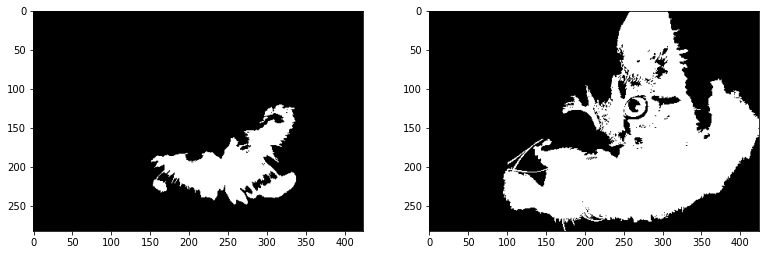

In [17]:
#To find the largest component 
largest_component1 = utils.getLargestCC(mask)
largest_component2 = utils.getLargestCC(average_mask)

#To show results
figure, ax = plt.subplots(1,2, figsize = (13, 13))
ax[0].imshow(largest_component1, 'gray')
ax[1].imshow(largest_component2, 'gray')

### Get the bouding box of binary mask

We can also get the bounding box coordinates of a bianary mask by using the method get_bounding_box. This method will return the top-right corner and the width and height of the box. Let's give a try with the first mask.

In [7]:
#Return [y_cordinates, x_cordinates], width, height
box_informations = utils.get_bounding_box(largest_component1)

To see plot the result we will use the method Rectangle from the patches module.

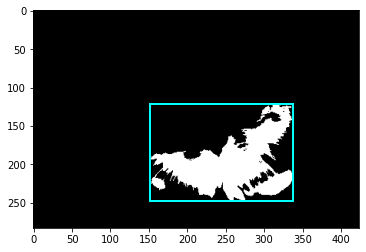

In [18]:
plt.imshow(largest_component1, 'gray')

ax = plt.gca()

rect = patches.Rectangle( (box_informations[0][1],box_informations[0][0]) , box_informations[1],box_informations[2],linewidth=2,edgecolor='cyan',fill = False)

ax.add_patch(rect)

plt.show()

### Transform the bounding box  into a binary mask

The method make_matrix transform the bounding box coordinates into a binary matrix.

In [9]:
matrix = utils.make_matrix(largest_component1, box_informations)

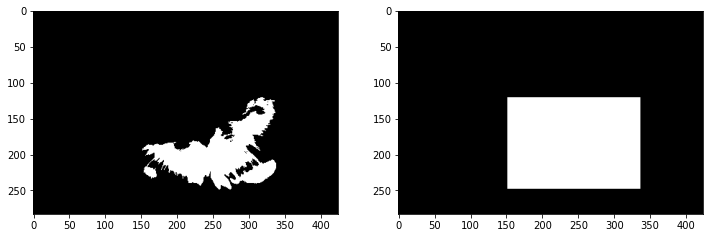

In [19]:
figure, ax = plt.subplots(1,2, figsize = (12, 12))

ax[0].imshow(largest_component1, 'gray')
ax[1].imshow(matrix, 'gray')

Let's test those methods in more images.

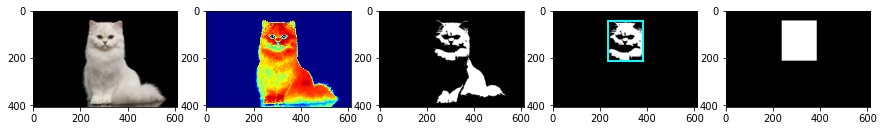

In [20]:
image1 = Image.open('../Images/Images_examples/cat.jpg')
heat_map1 = cv.imread("../Images/Images_examples/cat.jpg", cv.COLORMAP_JET)
mask3 = utils.binarize(heat_map1, 190)
largest_component3 = utils.getLargestCC(mask3)
bounding_box_informations1 = utils.get_bounding_box(largest_component3)
matrix2 = utils.make_matrix(mask3, bounding_box_informations1)

#Show results
fig1, ax1 = plt.subplots(1,5, figsize = (15, 15))

ax1[0].imshow(image1)
ax1[1].imshow(heat_map1, origin="upper", cmap='jet', interpolation='nearest')
ax1[2].imshow(mask3, 'gray')
ax1[3].imshow(largest_component3, 'gray')

rect1 = patches.Rectangle( (bounding_box_informations1[0][1],bounding_box_informations1[0][0]) , bounding_box_informations1[1],bounding_box_informations1[2],linewidth=2,edgecolor='cyan',fill = False)

ax1[3].add_patch(rect1)
ax1[4].imshow(matrix2, 'gray')

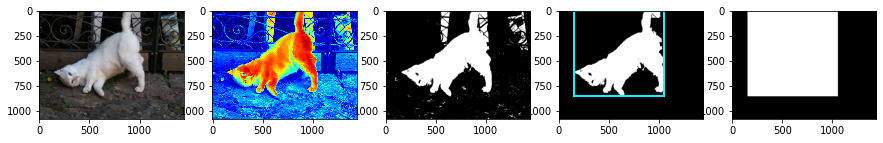

In [22]:
image2 = Image.open('../Images/Images_examples/cat2.jpg')
heat_map2 = cv.imread("../Images/Images_examples/cat2.jpg", cv.COLORMAP_JET)
mask4 = utils.binarize(heat_map2, 100)
largest_component4 = utils.getLargestCC(mask4)
bounding_box_informations2 = utils.get_bounding_box(largest_component4)
matrix3 = utils.make_matrix(mask4, bounding_box_informations2)

#Show results
fig1, ax1 = plt.subplots(1,5, figsize = (15, 15))

ax1[0].imshow(image2)
ax1[1].imshow(heat_map2, origin="upper", cmap='jet', interpolation='nearest')
ax1[2].imshow(mask4, 'gray')
ax1[3].imshow(largest_component4, 'gray')

rect2 = patches.Rectangle( (bounding_box_informations2[0][1],bounding_box_informations2[0][0]) , bounding_box_informations2[1],bounding_box_informations2[2],linewidth=2,edgecolor='cyan',fill = False)

ax1[3].add_patch(rect2)
ax1[4].imshow(matrix3, 'gray')

### Get the ground truth mask  from a trimaps

The method read_trimap() read the file image and transform  it into a matrix containing three values, 0 for background, 1 for contours and 2 for foreground pixels. We can transform those trimaps by using the method transform trimaps().

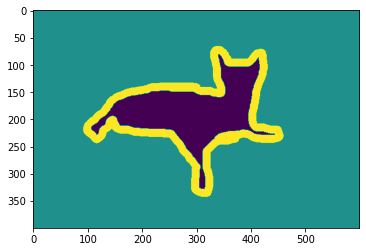

In [2]:
trimap = utils.read_trimap("../Images/EXP_DATA/Masks/Abyssinian_1.png")
plt.imshow(trimap)

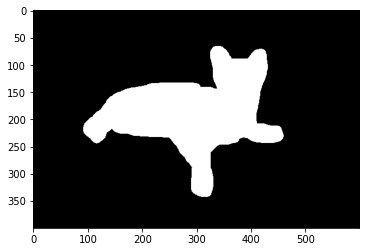

In [5]:
binary_map = utils.transform_trimap(trimap)
plt.imshow(binary_map, 'gray')